# Klasifikasi Penerimaan Murid Prasekolah menggunakan Support Vector Machine (SVM)

KELOMPOK 3
- 2210511046 Hanifah Az-Zahra
- 2210511054 Dinda Cantika Putri
- 2210511070 Choirunnisa Zalfaa Nabilah
- 2210511072 Edwina Martha Putri

## Preprocessing Data

In [81]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [82]:
# Menambahkan header
headers = ["parents", "has_nurs", "form", "children", "housing", "finance", "social", "health", "class"]

df = pd.read_csv('nursery/nursery.data', names=headers)

df.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [83]:
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   class     12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


*missing value*

In [85]:
df.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

*duplicate*

In [86]:
df.duplicated().sum()

0

*outlier check*

In [87]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print("\n")

parents
usual          4320
pretentious    4320
great_pret     4320
Name: parents, dtype: int64


has_nurs
proper         2592
less_proper    2592
improper       2592
critical       2592
very_crit      2592
Name: has_nurs, dtype: int64


form
complete      3240
completed     3240
incomplete    3240
foster        3240
Name: form, dtype: int64


children
1       3240
2       3240
3       3240
more    3240
Name: children, dtype: int64


housing
convenient    4320
less_conv     4320
critical      4320
Name: housing, dtype: int64


finance
convenient    6480
inconv        6480
Name: finance, dtype: int64


social
nonprob          4320
slightly_prob    4320
problematic      4320
Name: social, dtype: int64


health
recommended    4320
priority       4320
not_recom      4320
Name: health, dtype: int64


class
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: class, dtype: int64




*feature selection*

In [88]:
# Filter hanya baris dengan class 'not_recom', 'priority' dan 'spec prior'
df = df[df['class'].isin(['not_recom', 'priority', 'spec_prior'])]

# Tampilkan jumlah kelas 'not_recom' dan 'priority'
print(df['class'].value_counts())

not_recom     4320
priority      4266
spec_prior    4044
Name: class, dtype: int64


In [89]:
# Pilih kolom yang akan digunakan
kolom_pilihan = ['social', 'finance', 'health', 'class']
df_pilihan = df[kolom_pilihan].copy()

df_pilihan.head()

,social,finance,health,class
1,nonprob,convenient,priority,priority
2,nonprob,convenient,not_recom,not_recom
4,slightly_prob,convenient,priority,priority
5,slightly_prob,convenient,not_recom,not_recom
6,problematic,convenient,recommended,priority


*encoding*

In [90]:
le = LabelEncoder()

df_pilihan.loc[:, 'social'] = le.fit_transform(df_pilihan['social'])
df_pilihan.loc[:, 'finance'] = le.fit_transform(df_pilihan['finance'])
df_pilihan.loc[:, 'health'] = le.fit_transform(df_pilihan['health'])
df_pilihan.loc[:, 'class'] = le.fit_transform(df_pilihan['class'])

df_pilihan.head()

C:\Users\Hanifah Az-Zahra\AppData\Local\Temp\ipykernel_4352\955443363.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_pilihan.loc[:, 'social'] = le.fit_transform(df_pilihan['social'])
C:\Users\Hanifah Az-Zahra\AppData\Local\Temp\ipykernel_4352\955443363.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_pilihan.loc[:, 'finance'] = le.fit_transform(df_pilihan['finance'])
C:\Users\Hanifah Az-Zahra\AppData\Local\Temp\ipykernel_4352\955443363.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inp

,social,finance,health,class
1,0,0,1,1
2,0,0,0,0
4,2,0,1,1
5,2,0,0,0
6,1,0,2,1


*splitting*

In [91]:
X = df_pilihan[['social', 'finance', 'health']]
y = df_pilihan['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Training: ", X_train.shape)
print("Data Testing: ", X_test.shape)

Data Training:  (10104, 3)
Data Testing:  (2526, 3)


*Modeling Evaluasi*

In [92]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', decision_function_shape='ovo')
svm_model.fit(X_train, y_train)
svm_predict = svm_model.predict(X_test)

In [93]:
df_hasil = X_test.copy()
df_hasil['Label asli'] = y_test.values
df_hasil['Label prediksi'] = svm_predict

In [94]:
df_hasil['Prediksi benar'] = df_hasil['Label asli'] == df_hasil['Label prediksi']
prediksi_benar = df_hasil['Prediksi benar'].sum()

print(df_hasil.head(20))
print(f'Jumlah hasil prediksi yang benar adalah {prediksi_benar}')

       social  finance  health  Label asli  Label prediksi  Prediksi benar
9234        0        0       2           1               1            True
11965       2        1       1           2               2            True
4530        2        1       2           1               1            True
11732       2        1       0           0               0            True
8441        1        1       0           0               0            True
11107       0        0       1           2               2            True
7272        0        0       2           2               1           False
12532       2        0       1           2               2            True
1057        2        1       1           1               2           False
1707        1        1       2           1               1            True
1817        1        1       0           0               0            True
8152        1        1       1           2               2            True
10081       0        0   

In [95]:
df_hasil.to_csv('Hasil_prediksiSVM_Linear.csv', index='False')

In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Accuracy Score: {accuracy_score(y_test, svm_predict)}")
print(f"Classification Report:\n {classification_report(y_test, svm_predict)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, svm_predict)}")

Accuracy Score: 0.7268408551068883
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       896
           1       0.61      0.55      0.58       861
           2       0.55      0.60      0.57       769

    accuracy                           0.73      2526
   macro avg       0.72      0.72      0.72      2526
weighted avg       0.73      0.73      0.73      2526

Confusion Matrix:
 [[896   0   0]
 [  0 476 385]
 [  0 305 464]]


In [97]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

sk_fold = StratifiedKFold(n_splits=5)
scores = cross_val_score(svm_model, X, y, cv=sk_fold)

print(f"Cross Validation Score: ", scores)
print(f"Rata Rata Accuracy: {scores.mean():.2f}")
print(f"Standar Deviasi: {scores.std():.2f}")

Cross Validation Score:  [0.68923199 0.70190024 0.72961203 0.7442597  0.77632621]
Rata Rata Accuracy: 0.73
Standar Deviasi: 0.03


In [98]:
from sklearn.svm import SVC

svm_modelrbf = SVC(kernel='rbf', decision_function_shape='ovo')
svm_modelrbf.fit(X_train, y_train)
svm_predrbf = svm_modelrbf.predict(X_test)

In [99]:
df_hasilrbf = X_test.copy()
df_hasilrbf['Label asli'] = y_test.values
df_hasilrbf['Label prediksi'] = svm_predrbf

In [100]:
df_hasilrbf['Prediksi benar'] = df_hasilrbf['Label asli'] == df_hasilrbf['Label prediksi']
prediksi_benarrbf = df_hasilrbf['Prediksi benar'].sum()

print(df_hasilrbf.head(20))
print(f'Jumlah hasil prediksi yang benar adalah {prediksi_benarrbf}')

       social  finance  health  Label asli  Label prediksi  Prediksi benar
9234        0        0       2           1               1            True
11965       2        1       1           2               2            True
4530        2        1       2           1               1            True
11732       2        1       0           0               0            True
8441        1        1       0           0               0            True
11107       0        0       1           2               2            True
7272        0        0       2           2               1           False
12532       2        0       1           2               2            True
1057        2        1       1           1               2           False
1707        1        1       2           1               2           False
1817        1        1       0           0               0            True
8152        1        1       1           2               2            True
10081       0        0   

In [101]:
df_hasilrbf.to_csv('Hasil_prediksiSVM_rbf.csv', index='False')

In [102]:
print(f"Accuracy Score: {accuracy_score(y_test, svm_predrbf)}")
print(f"Classification Report:\n {classification_report(y_test, svm_predrbf)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, svm_predrbf)}")

Accuracy Score: 0.7387173396674585
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       896
           1       0.70      0.41      0.51       861
           2       0.55      0.81      0.65       769

    accuracy                           0.74      2526
   macro avg       0.75      0.74      0.72      2526
weighted avg       0.76      0.74      0.73      2526

Confusion Matrix:
 [[896   0   0]
 [  0 349 512]
 [  0 148 621]]


In [103]:
sk_fold = StratifiedKFold(n_splits=5)
scores = cross_val_score(svm_modelrbf, X, y, cv=sk_fold)

print(f"Cross Validation Score: ", scores)
print(f"Rata Rata Accuracy: {scores.mean():.2f}")
print(f"Standar Deviasi: {scores.std():.2f}")

Cross Validation Score:  [0.69200317 0.70942201 0.746635   0.76524149 0.8087886 ]
Rata Rata Accuracy: 0.74
Standar Deviasi: 0.04


*Menyimpan model ke pickle*

In [104]:
import pickle

pickle.dump(svm_model, open('linear_model', 'wb'))

In [105]:
loaded_model_linear = pickle.load(open('linear_model', 'rb'))
result_linear = loaded_model_linear.score(X_test, y_test)
print(result_linear)

0.7268408551068883


In [106]:
pickle.dump(svm_modelrbf, open('rbf_model', 'wb'))

In [107]:
loaded_model_rbf = pickle.load(open('rbf_model', 'rb'))
result_rbf = loaded_model_rbf.score(X_test, y_test)
print(result_rbf)

0.7387173396674585


*Visualisasi*

c:\Users\Hanifah Az-Zahra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


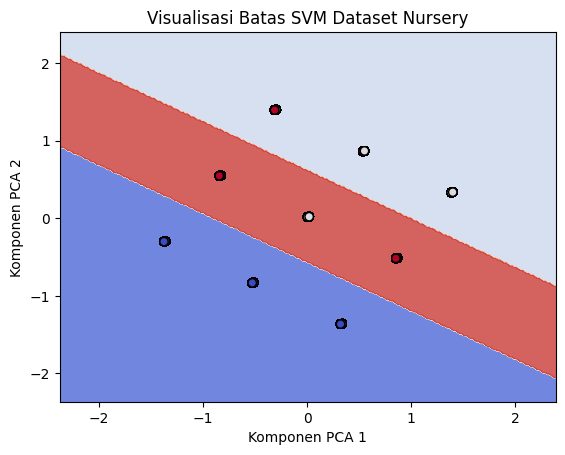

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Kurangi dimensi untuk visualisasi (2D) dengan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualisasi SVM pada data training
def plot_pca_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # Prediksi model pada tiap titik meshgrid
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Hasil plot area keputusan
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Plot data training
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Komponen PCA 1') # namanya ganti
    plt.ylabel('Komponen PCA 2')
    plt.title('Visualisasi Batas SVM Dataset Nursery')
    plt.show()

# Panggil fungsi untuk memvisualisasikan dengan model SVM terlatih
plot_pca_decision_boundary(X_train_pca, y_train,svm_model)

c:\Users\Hanifah Az-Zahra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


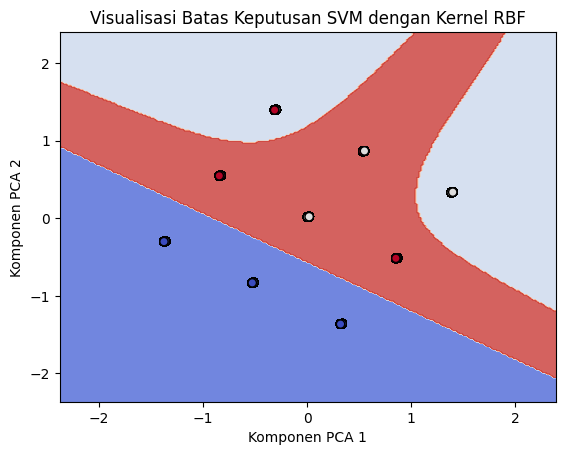

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Kurangi dimensi untuk visualisasi (2D) dengan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Melatih model SVM dengan kernel RBF
svm_model_rbf = SVC(kernel='rbf', gamma='auto')
svm_model_rbf.fit(X_train, y_train)

# Visualisasi SVM dengan boundary keputusan
def plot_pca_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    # Prediksi model pada tiap titik meshgrid
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Plot area keputusan
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Plot data latih
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Komponen PCA 1')
    plt.ylabel('Komponen PCA 2')
    plt.title('Visualisasi Batas Keputusan SVM dengan Kernel RBF')
    plt.show()

# Memanggil fungsi untuk memvisualisasikan dengan model SVM terlatih
plot_pca_decision_boundary(X_train_pca, y_train,svm_modelrbf)